In [3]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
# load the dataset
data = pd.read_csv(r"C:\Users\vanes\Downloads\lifeexpectancy.csv")

In [5]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [6]:
# check dataset dimensions
data.shape

(2938, 22)

In [30]:
# present the datatype of the variables and other basic information
# the numbers beside each variable is the count of non-missing values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

## Handling Missing Values

In [33]:
# check for variables (i.e. columns) that have missing values
data.isnull().any()

Country                            False
Year                               False
Status                             False
Life expectancy                     True
Adult Mortality                     True
infant deaths                      False
Alcohol                             True
percentage expenditure             False
Hepatitis B                         True
Measles                            False
 BMI                                True
under-five deaths                  False
Polio                               True
Total expenditure                   True
Diphtheria                          True
 HIV/AIDS                          False
GDP                                 True
Population                          True
 thinness  1-19 years               True
 thinness 5-9 years                 True
Income composition of resources     True
Schooling                           True
dtype: bool

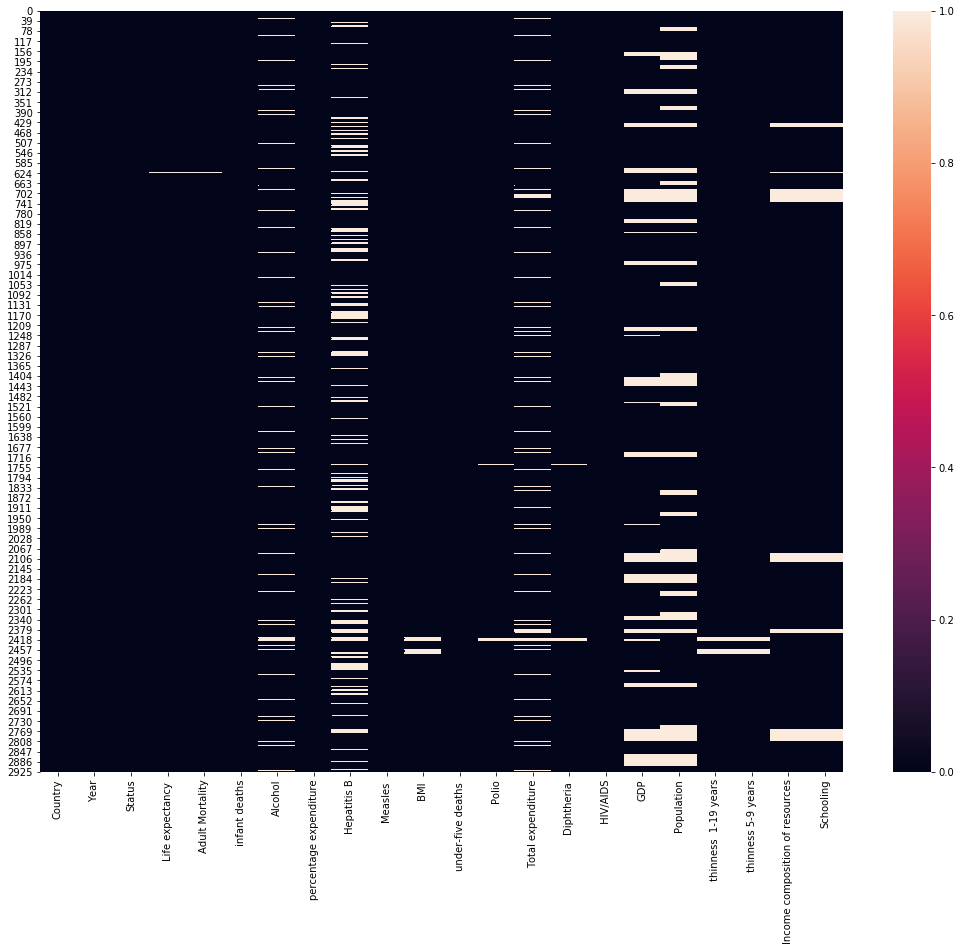

In [73]:
# visualize the patterns of missing values using seaborn heatmaps
plt.figure(figsize=(18, 14))
sns.heatmap(data.isnull())
plt.show()

In [56]:
# get the percentage of missing values
data_missing = data.isna()

In [57]:
percentage_missing = (data_missing.sum() / len(data)).round(4) * 100

In [58]:
percentage_missing.where(percentage_missing > 0)

Country                              NaN
Year                                 NaN
Status                               NaN
Life expectancy                     0.34
Adult Mortality                     0.34
infant deaths                        NaN
Alcohol                             6.60
percentage expenditure               NaN
Hepatitis B                        18.82
Measles                              NaN
 BMI                                1.16
under-five deaths                    NaN
Polio                               0.65
Total expenditure                   7.69
Diphtheria                          0.65
 HIV/AIDS                            NaN
GDP                                15.25
Population                         22.19
 thinness  1-19 years               1.16
 thinness 5-9 years                 1.16
Income composition of resources     5.68
Schooling                           5.55
dtype: float64

In [38]:
# we will deal with missing values by removing rows that are missing from the dataset
data_reduced = data.dropna()

In [41]:
# check new data dimensions after removing missing data
print('new dimensions:', data_reduced.shape)
print('old dimensions:', data.shape)

new dimensions: (1649, 22)
old dimensions: (2938, 22)


In [55]:
# check if the dataset that removed rows with missing values actually contains no missing values
data_reduced.isnull().any()

Country                            False
Year                               False
Status                             False
Life expectancy                    False
Adult Mortality                    False
infant deaths                      False
Alcohol                            False
percentage expenditure             False
Hepatitis B                        False
Measles                            False
 BMI                               False
under-five deaths                  False
Polio                              False
Total expenditure                  False
Diphtheria                         False
 HIV/AIDS                          False
GDP                                False
Population                         False
 thinness  1-19 years              False
 thinness 5-9 years                False
Income composition of resources    False
Schooling                          False
dtype: bool

## Handling Outliers

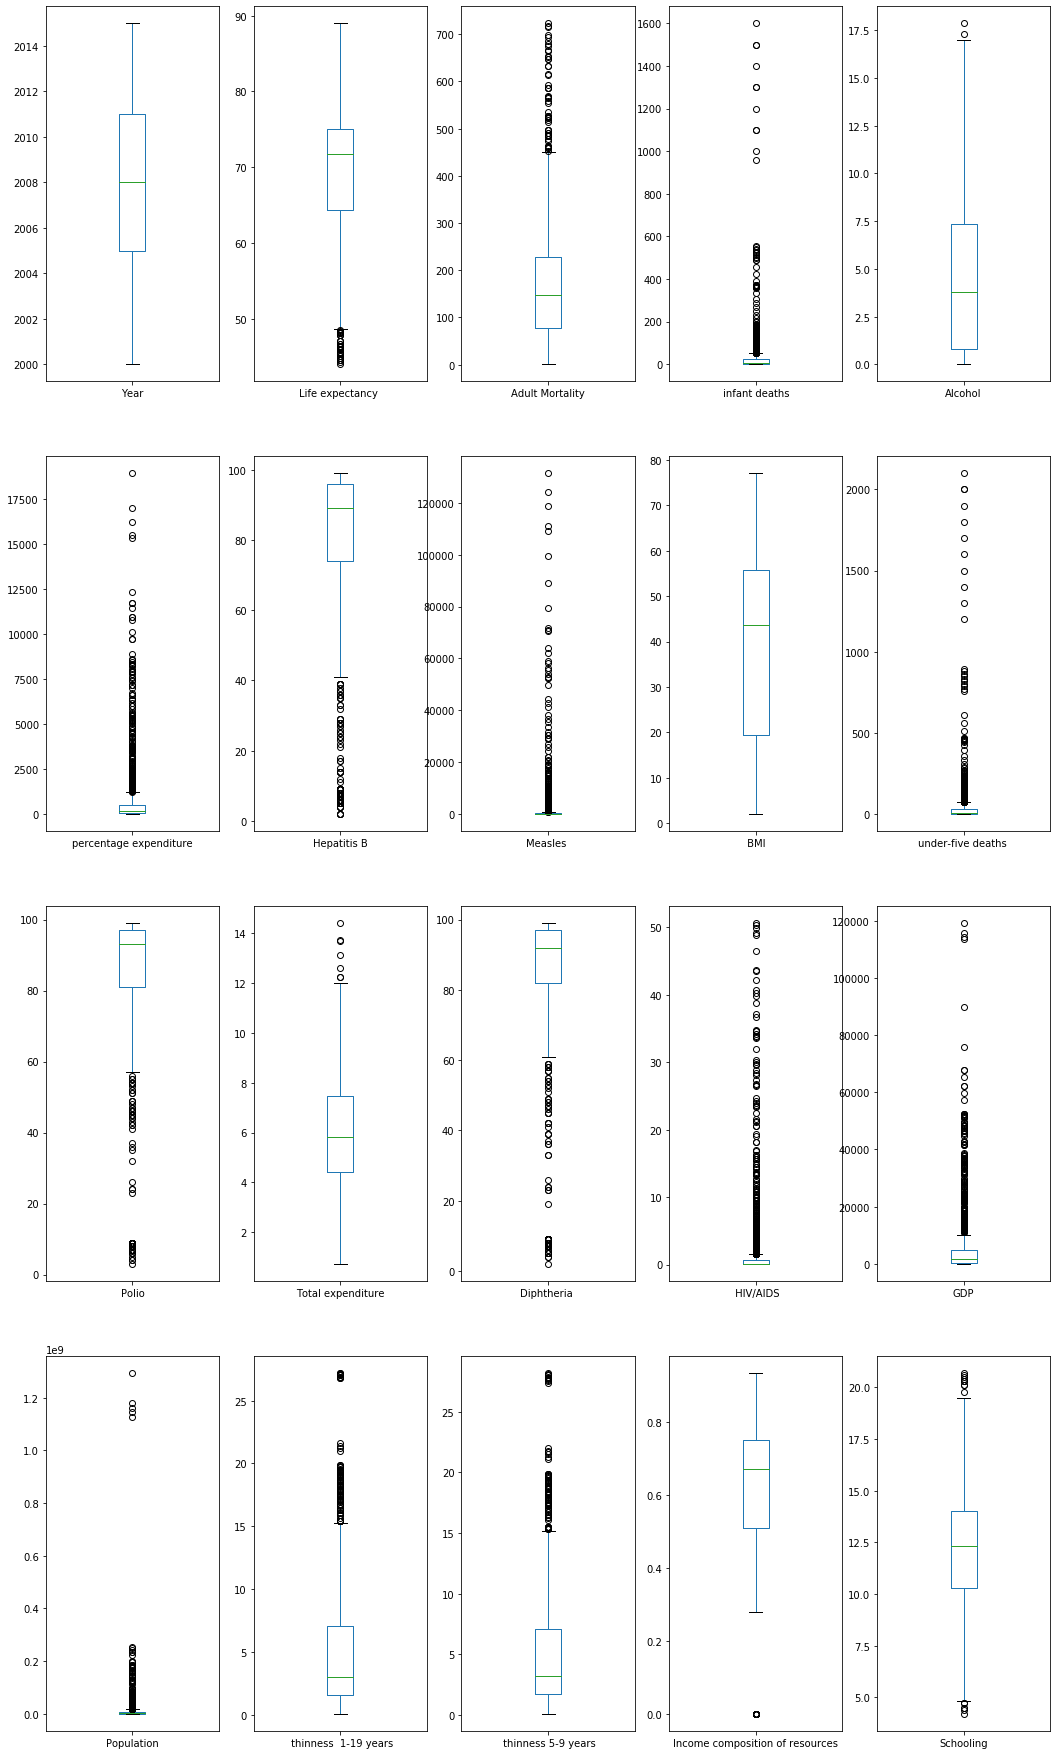

In [91]:
# visualize outliers using box and whisker plots
data_reduced.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(18, 40))
plt.show()

In [107]:
# remove rows with outliers using absolute z-scores
constraints = data_reduced.select_dtypes(include=[np.number]).apply(
    lambda x: np.abs(stats.zscore(x)) < 3, result_type='reduce').all(axis=1)

In [108]:
data_no_outliers = data_reduced.drop(data_reduced.index[~constraints])

In [110]:
# get shape of dataset with outliers removed
data_no_outliers.shape

(1290, 22)

In [116]:
data_no_outliers.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## Univariate and Multivariate Data Exploration

In [132]:
data_no_outliers

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,...,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3
2924,Zimbabwe,2013,Developing,58.0,399.0,25,6.39,10.666707,95.0,0,...,95.0,6.88,95.0,6.8,111.227396,155456.0,6.2,6.0,0.488,10.4
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,...,95.0,6.69,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8
2926,Zimbabwe,2011,Developing,54.9,464.0,28,6.00,63.750530,94.0,0,...,93.0,6.31,93.0,13.3,839.927936,14386649.0,6.8,6.7,0.452,10.1


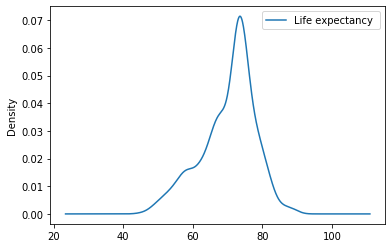

In [130]:
# univariate data exploration: find the density plots of the variables
# target = life expectancy

data_no_outliers.plot(kind='density', x=' BMI ', y='Life expectancy ')
plt.show()

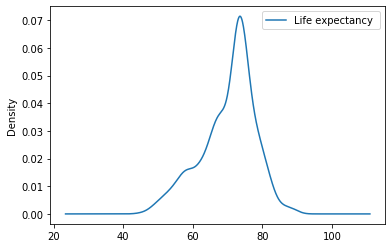

In [131]:
data_no_outliers.plot(kind='density', x='Alcohol', y='Life expectancy ')
plt.show()

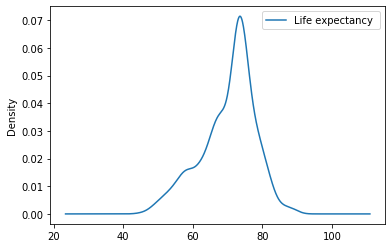

In [133]:
data_no_outliers.plot(kind='density', x='Hepatitis B', y='Life expectancy ')
plt.show()

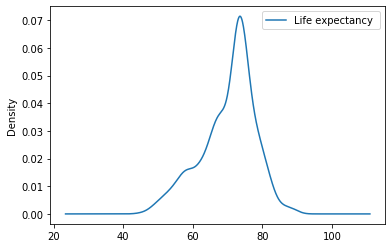

In [137]:
data_no_outliers.plot(kind='density', x='Polio', y='Life expectancy ')
plt.show()

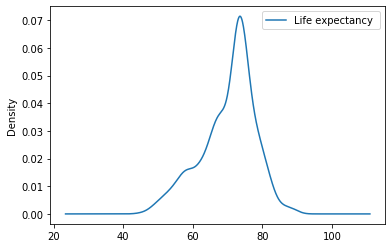

In [143]:
data_no_outliers.plot(kind='density', x='Income composition of resources', y='Life expectancy ')
plt.show()

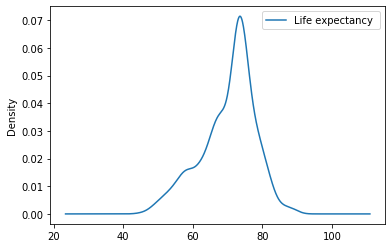

In [144]:
data_no_outliers.plot(kind='density', x='Schooling', y='Life expectancy ')
plt.show()

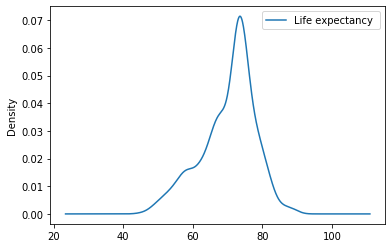

In [145]:
data_no_outliers.plot(kind='density', x='Adult Mortality', y='Life expectancy ')
plt.show()

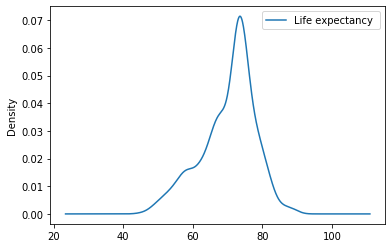

In [146]:
data_no_outliers.plot(kind='density', x='GDP', y='Life expectancy ')
plt.show()

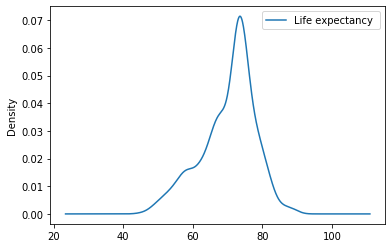

In [149]:
data_no_outliers.plot(kind='density', x='infant deaths', y='Life expectancy ')
plt.show()

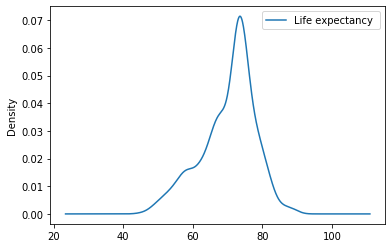

In [150]:
data_no_outliers.plot(kind='density', x='percentage expenditure', y='Life expectancy ')
plt.show()

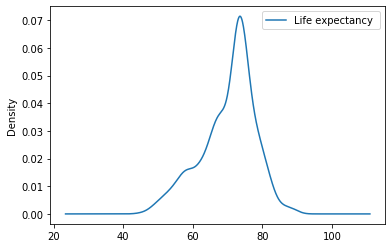

In [151]:
data_no_outliers.plot(kind='density', x='Total expenditure', y='Life expectancy ')
plt.show()

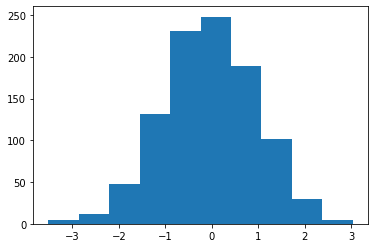

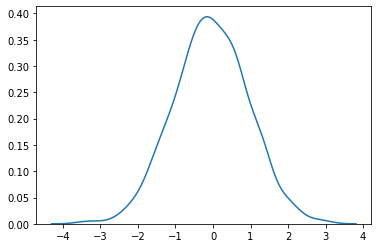

In [160]:
# create 1000 data points from the normal distributions
data = np.random.randn(1000)
# create a histogram plot
plt.hist(data)
plt.show()
# crate a density plot using seaborn
my_fig = sns.distplot(data, hist=False)
plt.show()

In [11]:
data_reduced = data.dropna()

constraints = data_reduced.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < 3, result_type='reduce').all(axis=1)

filtered_data = data_reduced.drop(data_reduced.index[~constraints])

In [12]:
filtered_data.corr()['Life expectancy ']

Year                              -0.047629
Life expectancy                    1.000000
Adult Mortality                   -0.675689
infant deaths                     -0.390088
Alcohol                            0.415656
percentage expenditure             0.447384
Hepatitis B                        0.173798
Measles                           -0.115475
 BMI                               0.534580
under-five deaths                 -0.447873
Polio                              0.470278
Total expenditure                  0.209305
Diphtheria                         0.467850
 HIV/AIDS                         -0.608565
GDP                                0.461646
Population                         0.032544
 thinness  1-19 years             -0.482721
 thinness 5-9 years               -0.479922
Income composition of resources    0.868656
Schooling                          0.753179
Name: Life expectancy , dtype: float64

<font size=4> Below we can see that the number of years of schooling had a relatively strong positive correlation with life expectancy.<br> People who have higher number years in school, have positive of correlation. People who have HIV/AIDS, have less life expectation. People who have higher income composition of resources, have higher life expectancy. People who drink alcohol, might have higher life expectancy. However, too much alcohol might decrease the life expectancy. People who have Hepatitis B, might have higher life expectancy. People who have polio, might have higher life expectancy. People who have adult mortality, have less life expectancy. People who have GDP, might have higher expectancy. Peple who have infant deaths, have less life expectancy. People who have percentage expenditure, might have higher life expectancy. People who have total expenditure, might have higher life expenditure.    
</font>  


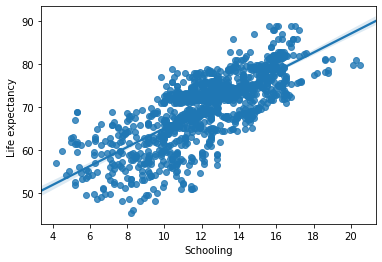

In [15]:
sns.regplot(filtered_data['Schooling'], filtered_data['Life expectancy '])


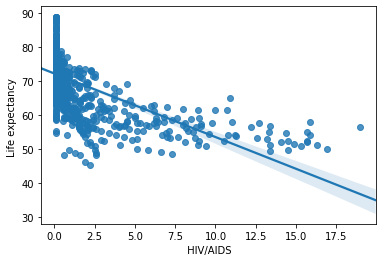

In [19]:
sns.regplot(filtered_data[' HIV/AIDS'], filtered_data['Life expectancy '])

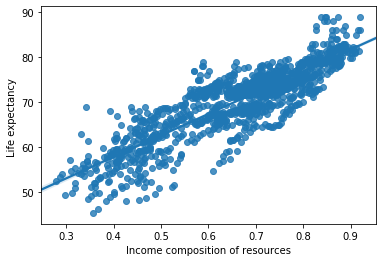

In [13]:
sns.regplot(filtered_data['Income composition of resources'], filtered_data['Life expectancy '])

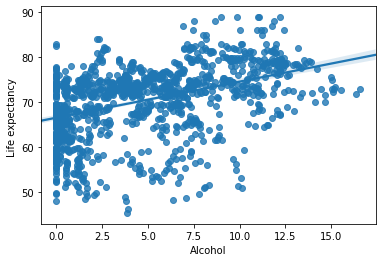

In [14]:
sns.regplot(filtered_data['Alcohol'], filtered_data['Life expectancy '])

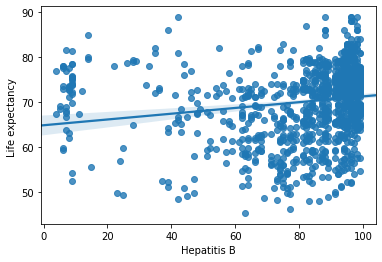

In [15]:
sns.regplot(filtered_data['Hepatitis B'], filtered_data['Life expectancy '])

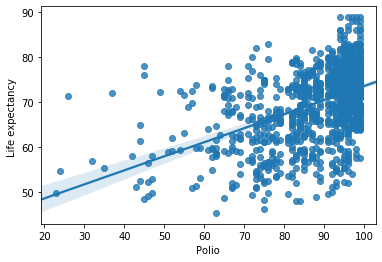

In [16]:
sns.regplot(filtered_data['Polio'], filtered_data['Life expectancy '])

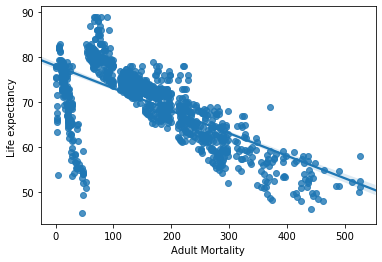

In [18]:
sns.regplot(filtered_data['Adult Mortality'], filtered_data['Life expectancy '])

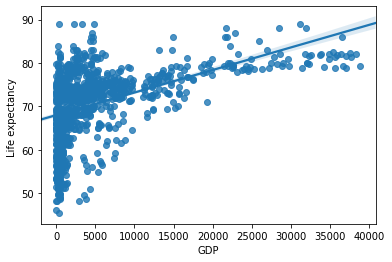

In [19]:
sns.regplot(filtered_data['GDP'], filtered_data['Life expectancy '])

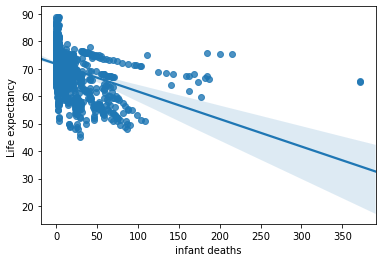

In [20]:
sns.regplot(filtered_data['infant deaths'], filtered_data['Life expectancy '])

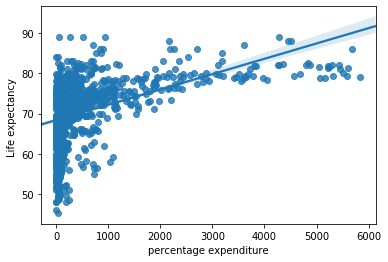

In [21]:
sns.regplot(filtered_data['percentage expenditure'], filtered_data['Life expectancy '])

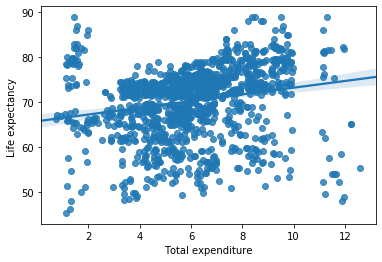

In [22]:
sns.regplot(filtered_data['Total expenditure'], filtered_data['Life expectancy '])

<font size=4> Base on [130]-[151] we notice the factors that to effect life expectancy are BMI, Alcohol, Hepatitis B, Polio, Income composition of resources, Schooling, Adult Mortality, GDP, infant deaths, percentage expenditure, and Total expenditure.
</font> 